In [22]:
from pathlib import Path

import polars as pl

from plot_functions import distribution_plot, line_plot_variables, violin_plot
from utils.metrics_process import read_metrics, get_assistant_data, aggregate_df

## SETUP

In [23]:
# prompt version (currently only working with 2.0, but nice to be able to easily change)
version = 3.0

In [24]:
metrics_dir = Path.cwd().parents[0] / "metrics"

plots_dir = Path.cwd().parents[0] / "plots" / f"v{version}"

curves_dir = plots_dir / "curves"
dist_dir = plots_dir / "dists"
violins_dir = plots_dir / "violins"

for dir in [curves_dir, dist_dir, violins_dir]:
    dir.mkdir(parents=True, exist_ok=True)

In [25]:
# for giving shorter names in df 
model_dict = {
    "meta-llama--Llama-3.1-8B-Instruct": "Llama 3.1 8B Instruct",
    "Qwen--Qwen2.5-7B-Instruct": "Qwen 2.5 7B Instruct",
    "mistralai--Mistral-7B-Instruct-v0.3": "Mistral 7B Instruct v0.3",
    "google--gemma-3-12b-it": "Gemma 3 12B IT",
}

## TEXT STATS: Load and Process

In [26]:
df = read_metrics(metrics_path=metrics_dir, model_dict=model_dict, version=version, metric_types=["text_stats"])
assistant_df = get_assistant_data(df)

In [27]:
assistant_df

role,content,model,group,id,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford,flesch_kincaid_grade,total_message_number
str,str,str,enum,str,f64,f64,f64,f64,f64,i64
"""assistant""","""Hola! ¿Cómo estás? ¿Tienes un …","""Mistral 7B Instruct v0.3""","""A1""","""20250328-150635.json""",106.03,101.13,50.73,2.1,6.2,1
"""assistant""","""Hola Aiden, ¡eso es maravillos…","""Mistral 7B Instruct v0.3""","""A1""","""20250328-150635.json""",93.42,87.67,43.06,3.3,8.8,2
"""assistant""","""Gracias por tus preguntas y po…","""Mistral 7B Instruct v0.3""","""A1""","""20250328-150635.json""",82.62,78.88,40.39,4.1,11.9,3
"""assistant""","""Lo siento, Aiden, pero me aleg…","""Mistral 7B Instruct v0.3""","""A1""","""20250328-150635.json""",78.76,77.03,41.92,4.2,12.2,4
"""assistant""","""Espero que pronto tengas la op…","""Mistral 7B Instruct v0.3""","""A1""","""20250328-150635.json""",96.76,93.41,43.65,2.9,8.7,5
…,…,…,…,…,…,…,…,…,…,…
"""assistant""","""¡Absolutamente perfecta! Esa e…","""Gemma 3 12B IT""","""C1""","""20250331-131627.json""",73.68,68.58,33.4,4.9,13.0,5
"""assistant""","""¡Maravilloso! Me alegro enorme…","""Gemma 3 12B IT""","""C1""","""20250331-131627.json""",77.64,71.81,37.34,4.7,12.6,6
"""assistant""","""¡Excelente! Has identificado á…","""Gemma 3 12B IT""","""C1""","""20250331-131627.json""",75.7,71.16,33.36,4.7,13.4,7


### Plot

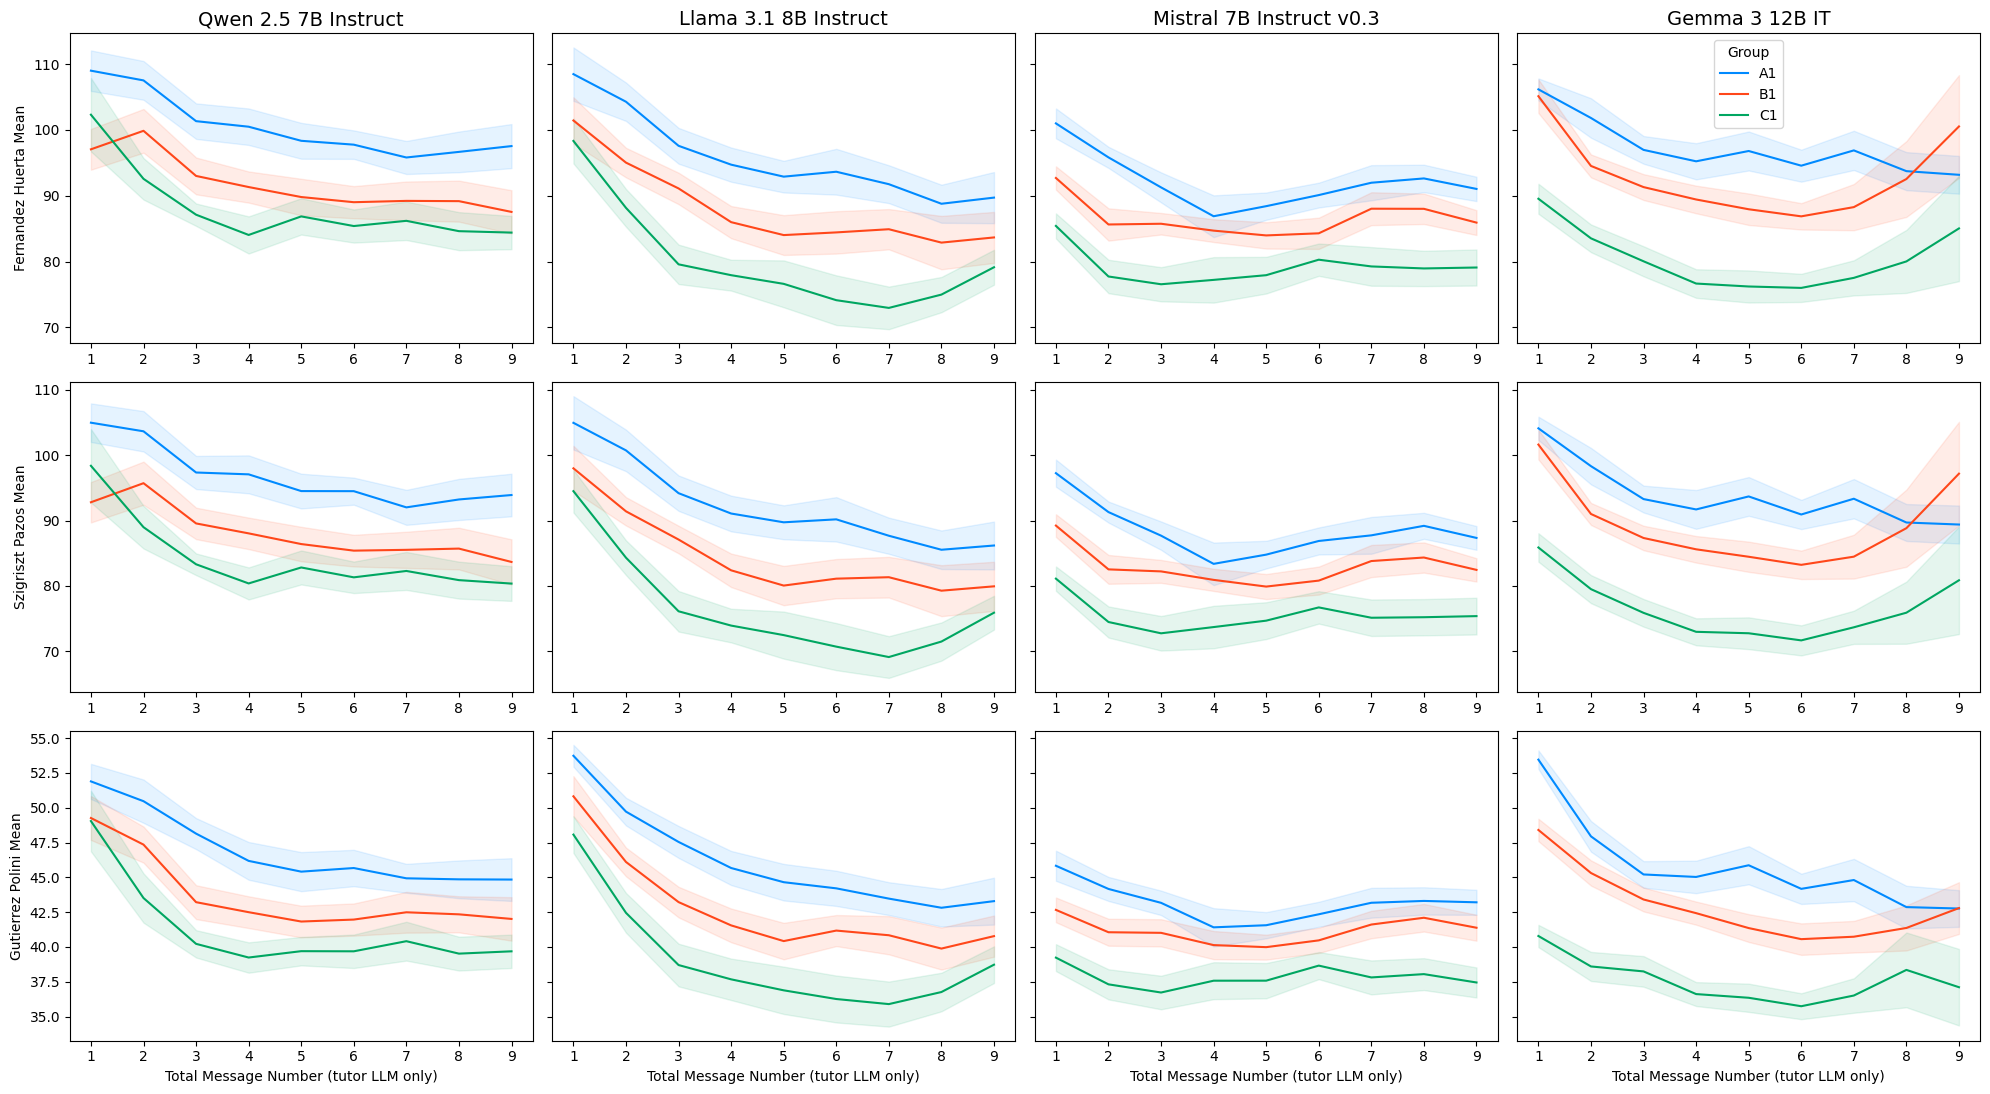

In [28]:
# only take cols 
cols = ["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini", "flesch_kincaid_grade", "crawford"]

# aggregate data
agg_df = aggregate_df(assistant_df, cols_to_aggregate=cols, ci_to_cols=True)

colors = ["#008aff", "#ff471a", "#00a661"]

cols = ["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini"]
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars, 
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "spanish_readability_high_easy.png", dpi=300)

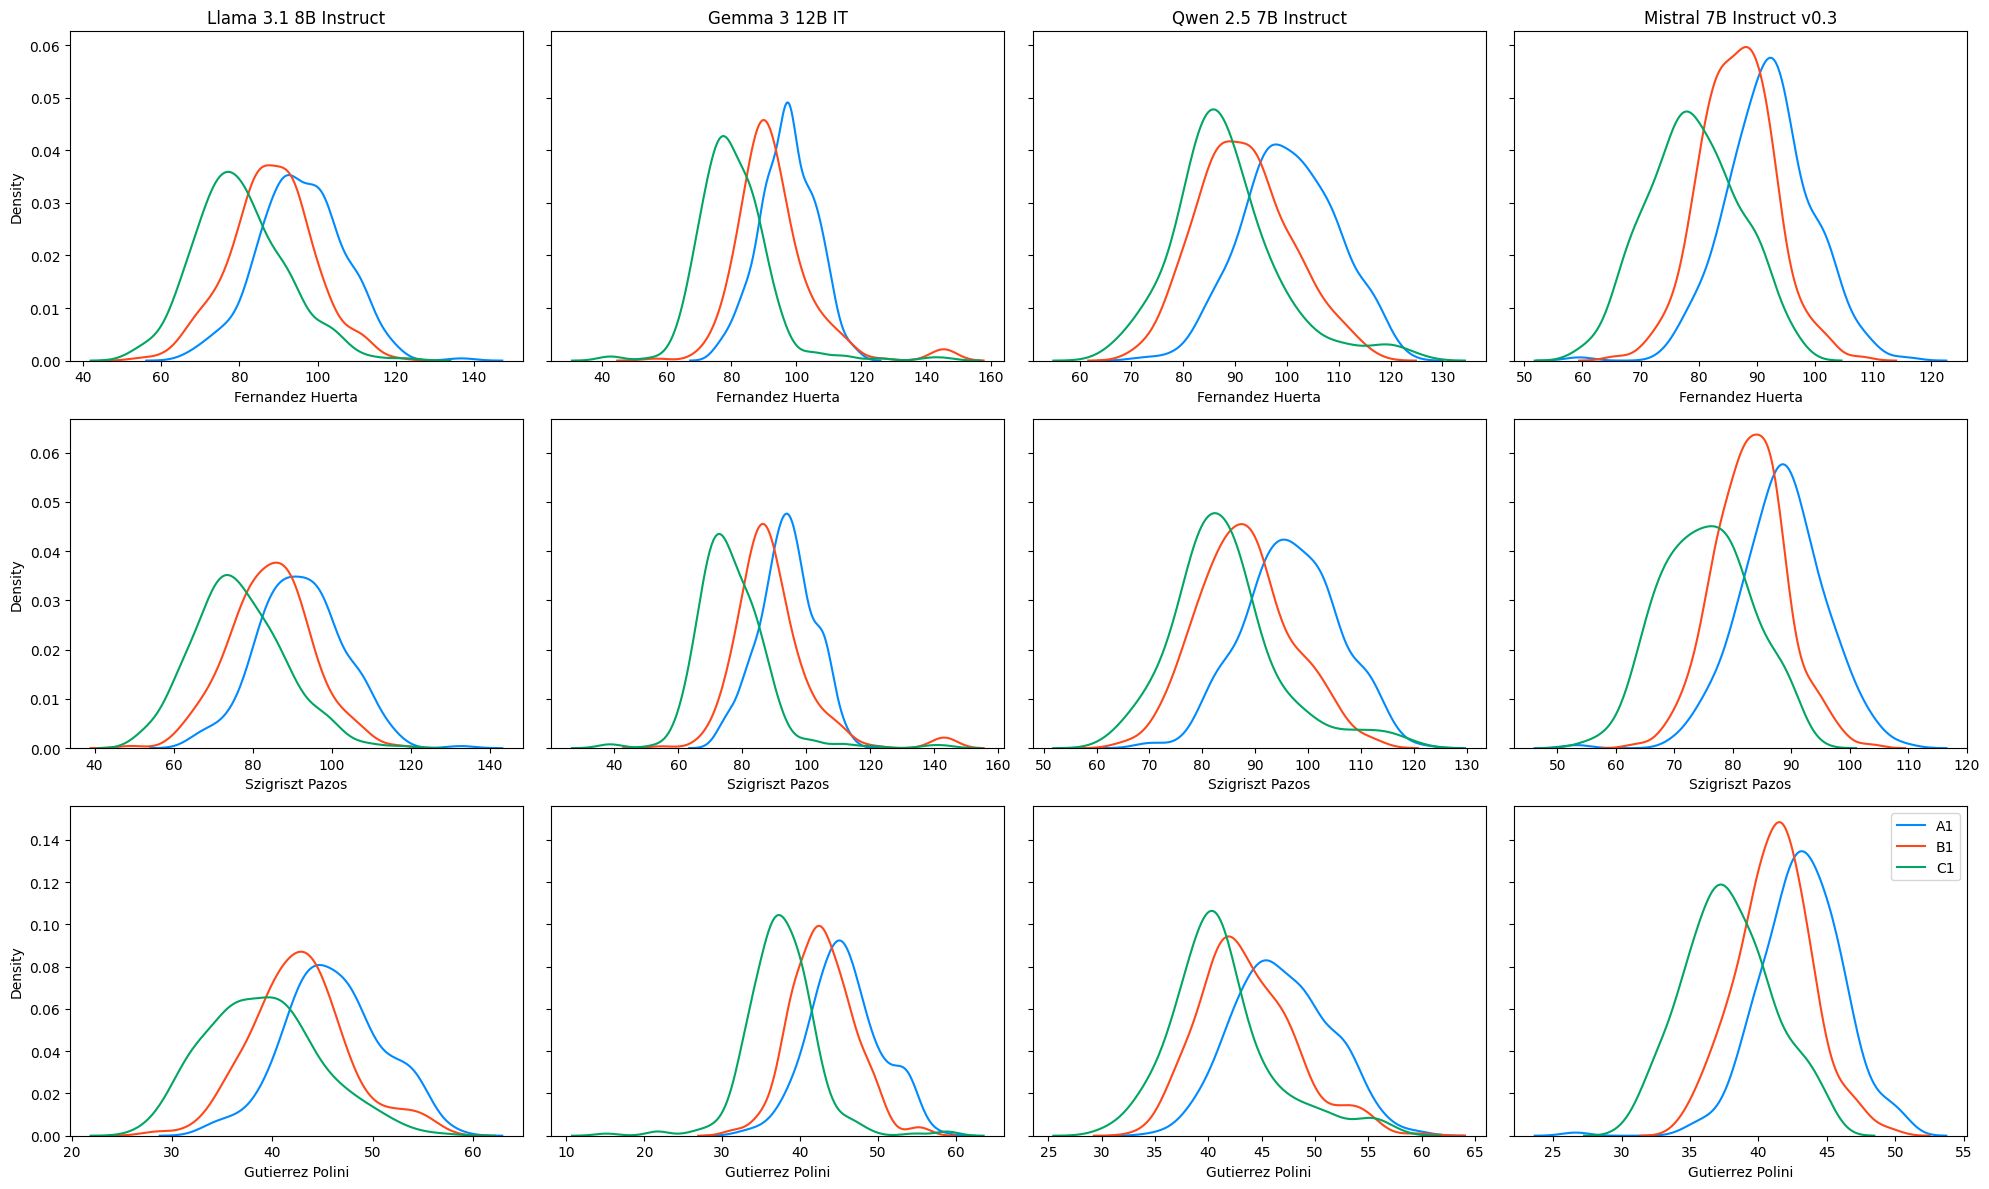

In [29]:
fig = distribution_plot(assistant_df, 
                        x_vars=["fernandez_huerta", "szigriszt_pazos", "gutierrez_polini"], 
                        group_var="group",
                        model_var="model",
                        normalize=True,
                        x_label_texts=["Fernandez Huerta", "Szigriszt Pazos", "Gutierrez Polini"], 
                        density_lines=True)

fig.savefig(dist_dir / "spanish_readability_high_easy.png", dpi=300)

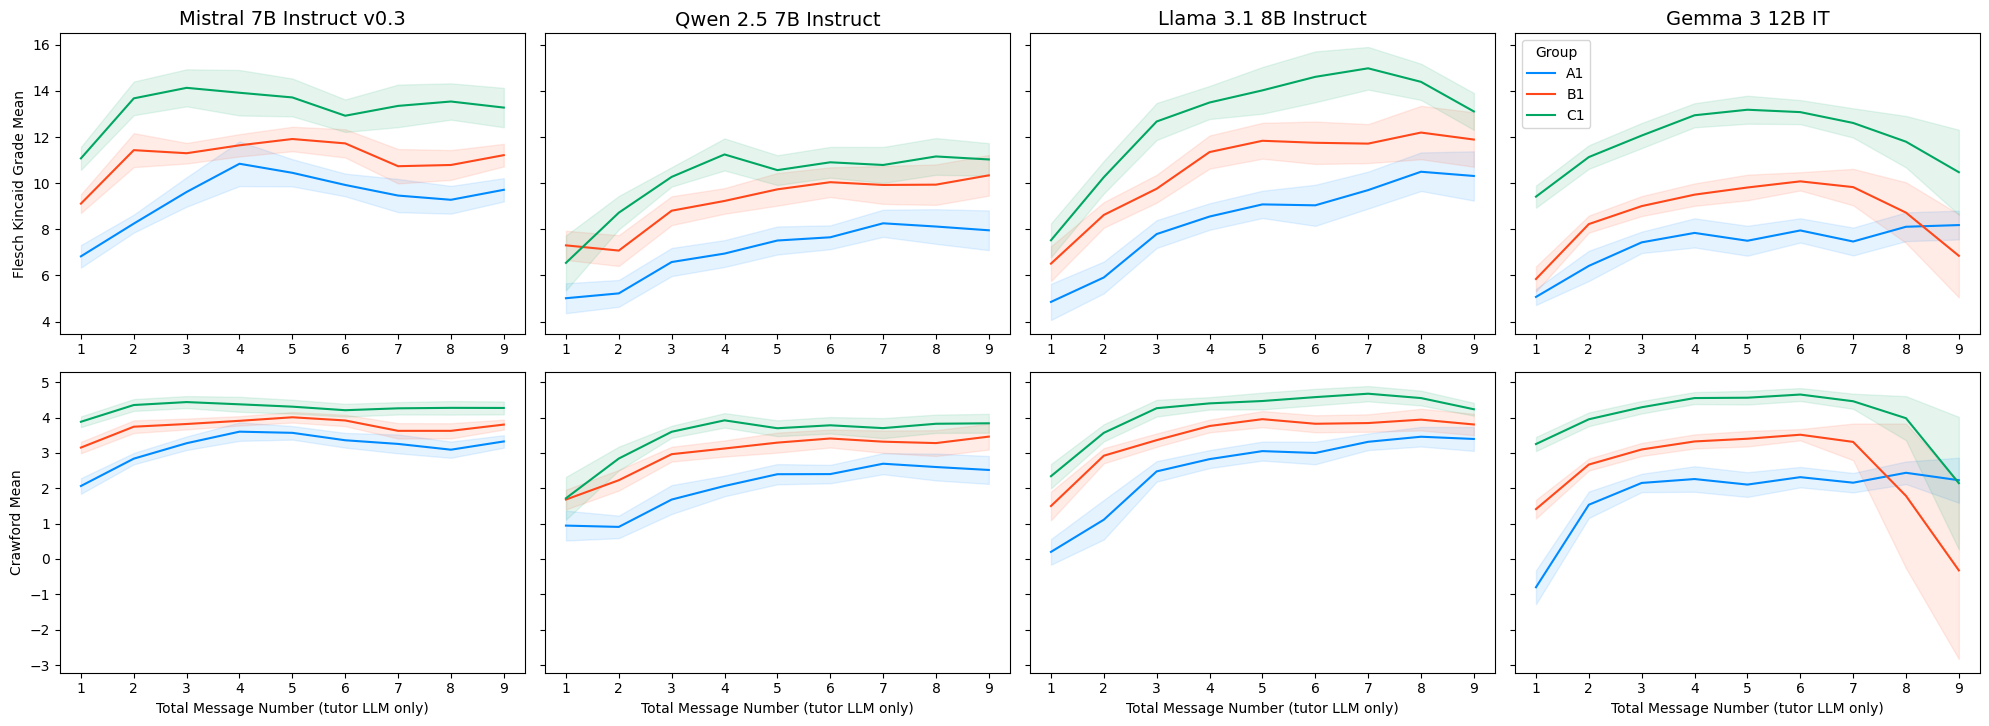

In [30]:
colors = ["#008aff", "#ff471a", "#00a661"]

cols = ["flesch_kincaid_grade", "crawford"]
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars,
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "spanish_readability_high_difficult.png", dpi=300)

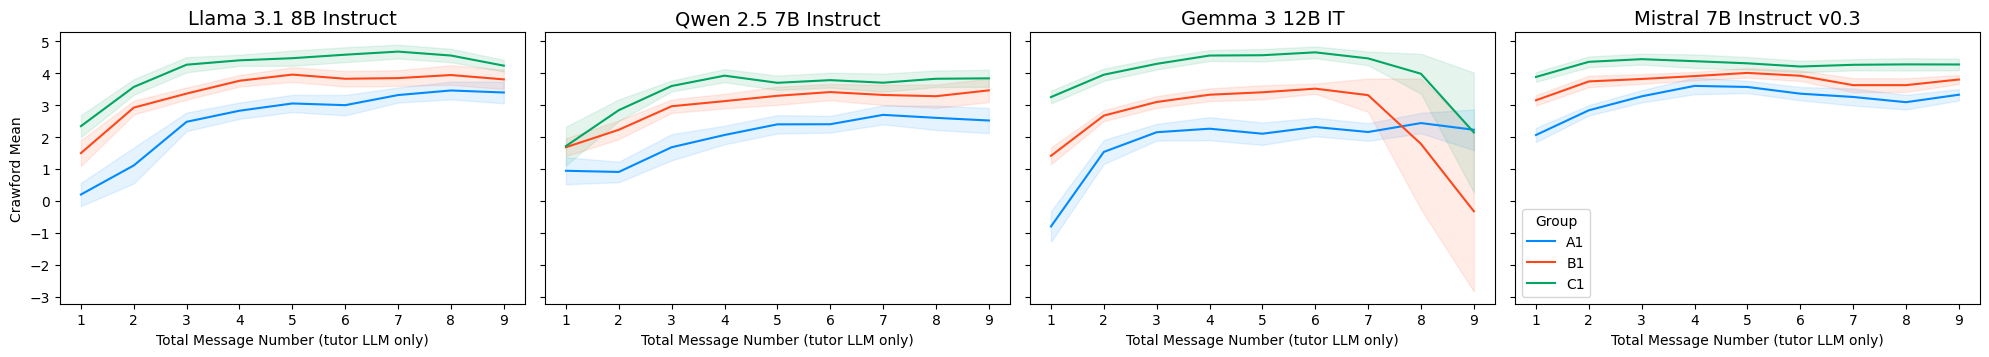

In [31]:
colors = ["#008aff", "#ff471a", "#00a661"]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=["crawford_mean"], 
                    ci_vars=["crawford_ci"],
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir/ "crawford.png", dpi=300)

## Dependency Distance, Doc Length

In [32]:
df = read_metrics(metrics_path=metrics_dir, model_dict=model_dict, version=version, metric_types=["textdescriptives"])
assistant_df = get_assistant_data(df)

In [33]:
null_values = assistant_df.filter(pl.col("dependency_distance_mean").is_null())
null_values.write_csv("test.csv")

In [34]:
cols = ["doc_length", "proportion_unique_tokens", "dependency_distance_mean", "n_sentences"]
agg_df = aggregate_df(assistant_df, cols_to_aggregate=cols, ci_to_cols=True)

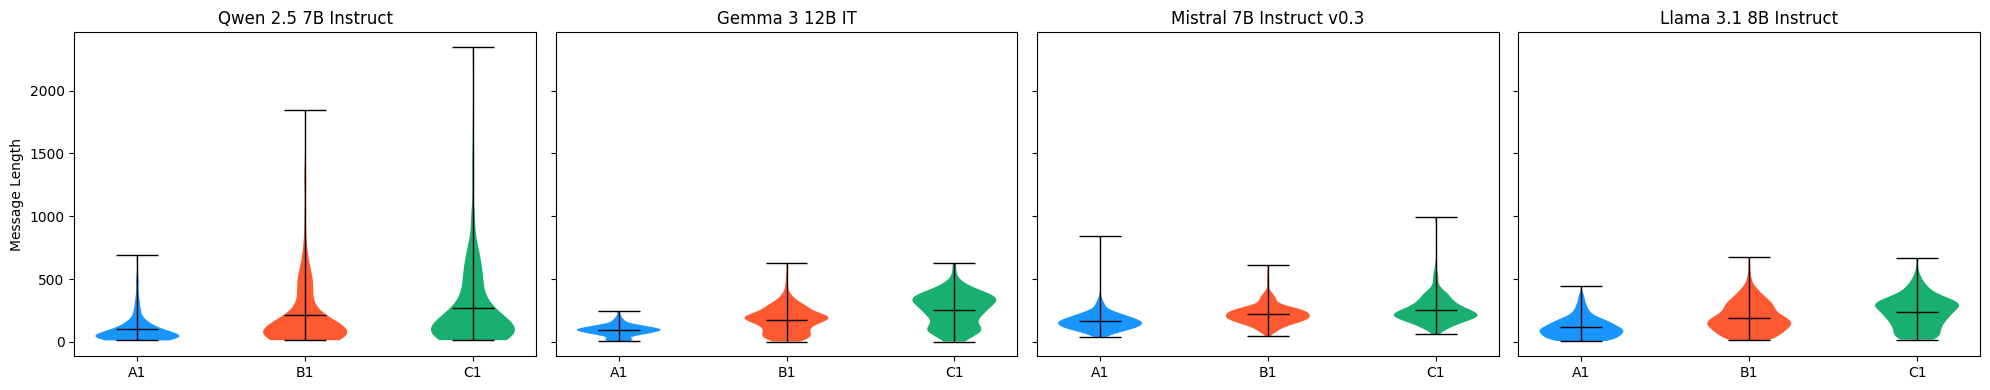

In [35]:
fig = violin_plot(
    assistant_df,  # Use the full dataset
    x_vars=["doc_length"],  # Pass raw values instead of mean
    group_var="group",
    model_var="model",
    y_label_texts=["Message Length"]
)

fig.savefig(violins_dir / "doc_length_violin.png", dpi=300)

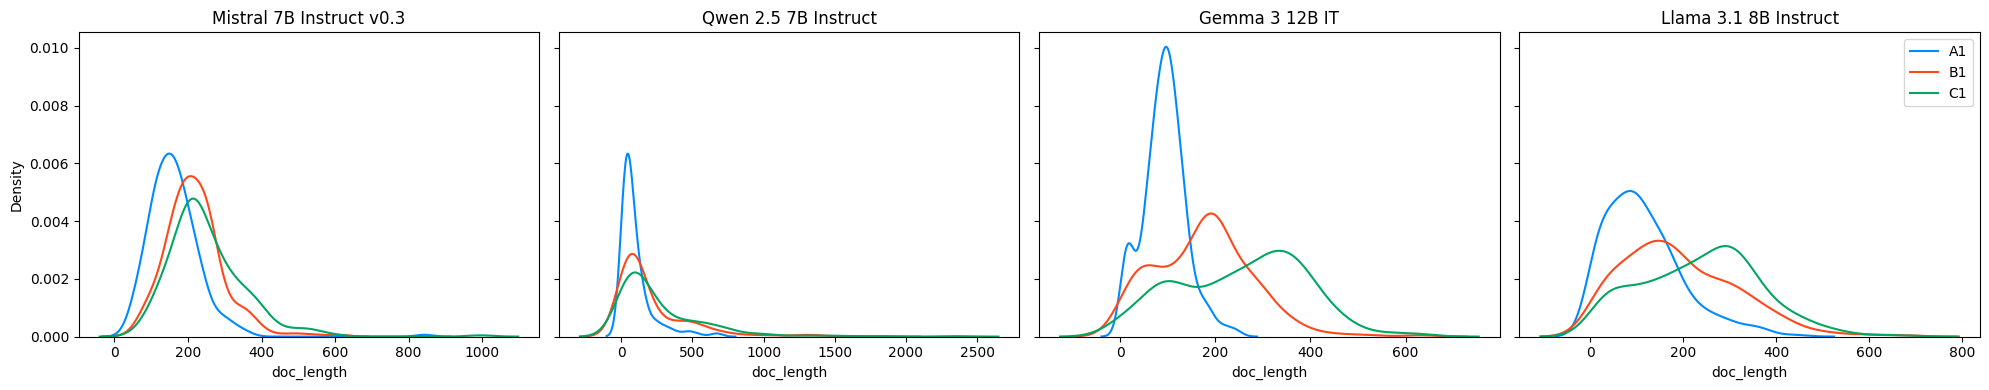

In [36]:
fig = distribution_plot(assistant_df, 
                        x_vars=["doc_length"], 
                        group_var="group",
                        model_var="model",
                        normalize=True,
                        x_label_texts=["doc_length"], 
                        density_lines=True)

fig.savefig(dist_dir / "doc_length_dist.png", dpi=300)

## Length and Dependency Dist

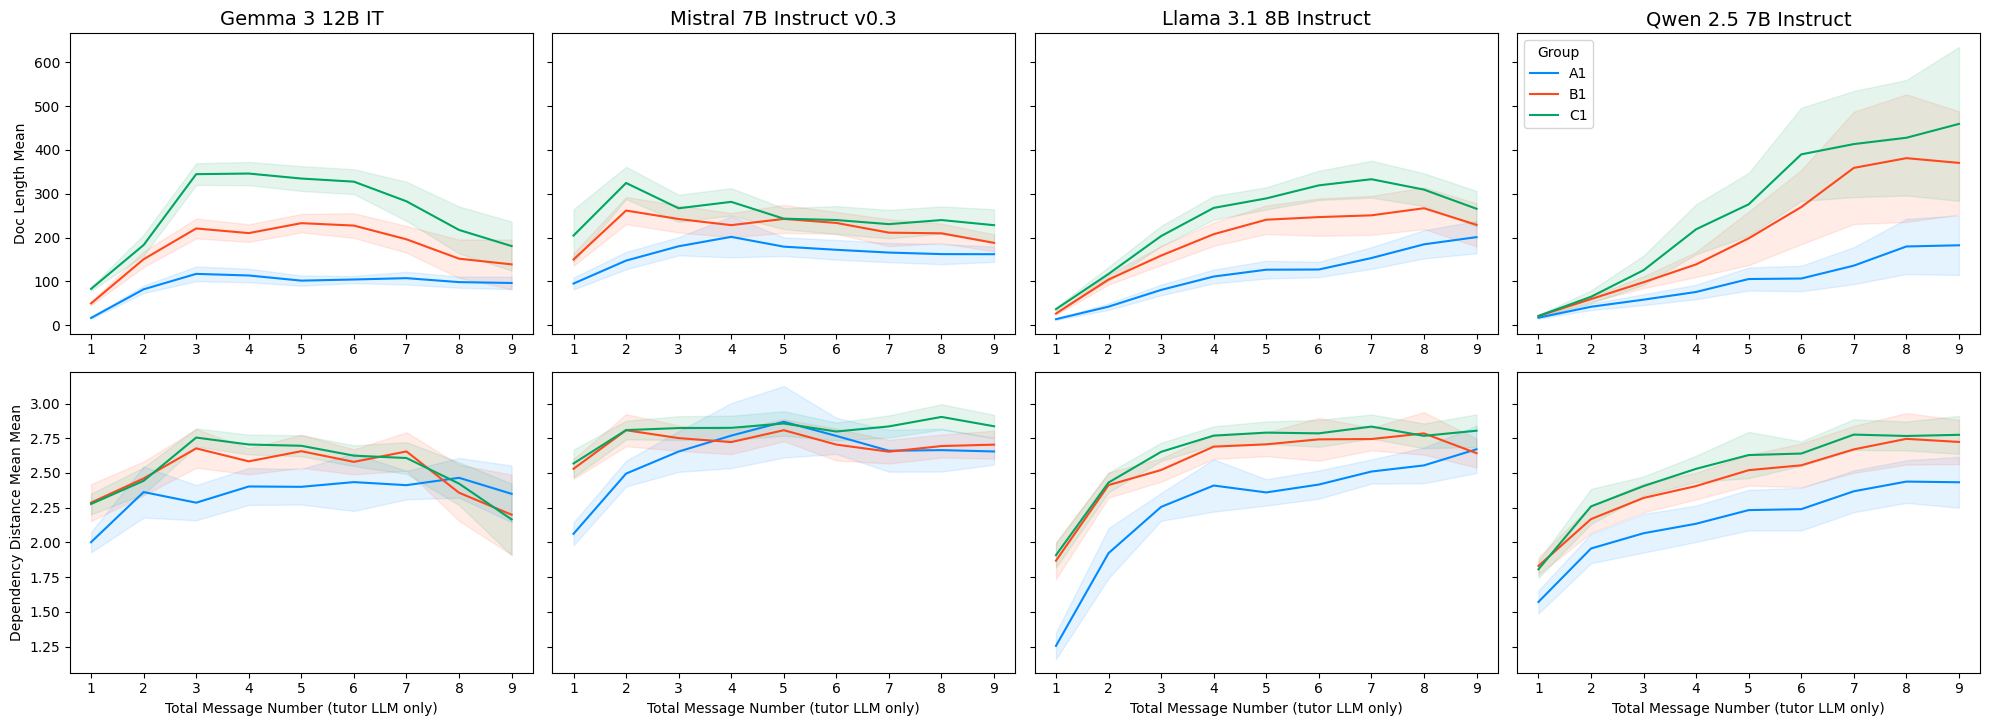

In [37]:
cols = ["doc_length", "dependency_distance_mean"] # consider number of sentences
vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]


fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars,
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "doc_length_and_MDD.png", dpi=300)

### Mean Dependency distance

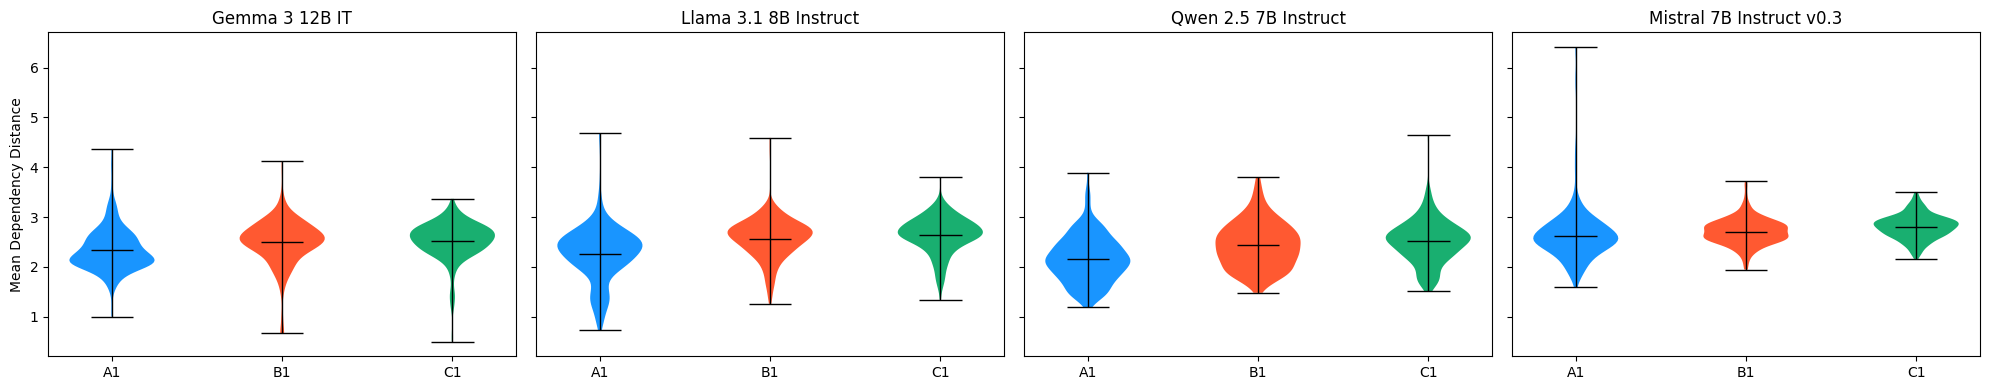

In [38]:
fig = violin_plot(
    assistant_df,  # Use the full dataset
    x_vars=["dependency_distance_mean"], 
    group_var="group",
    model_var="model",
    y_label_texts=["Mean Dependency Distance"]
)

fig.savefig(violins_dir / "mean_dependency_distance.png", dpi=300)

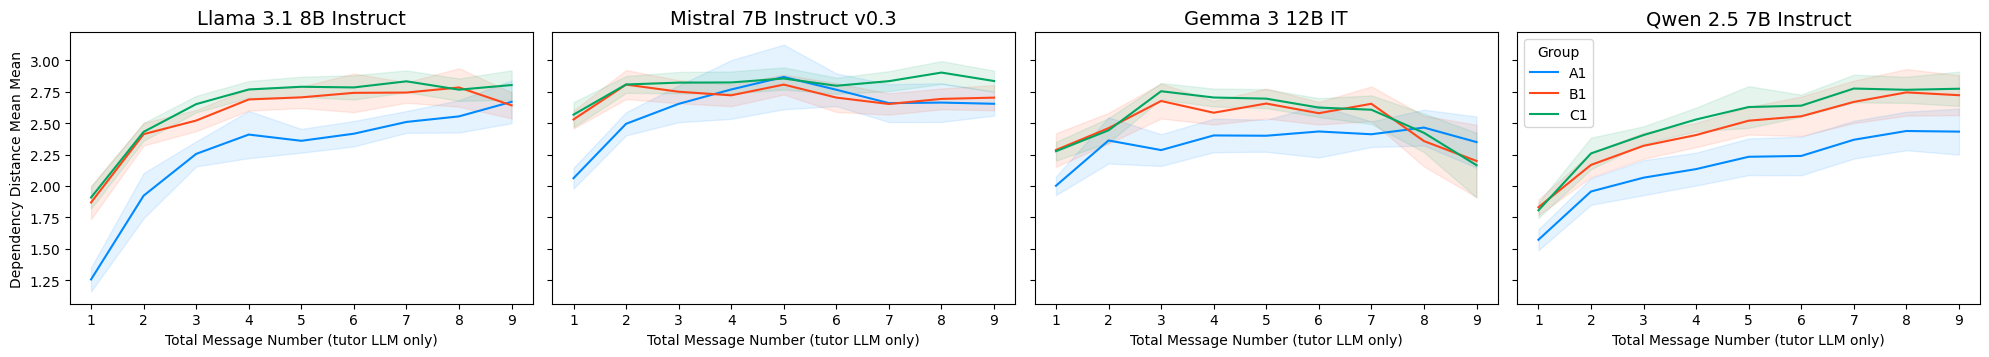

In [39]:
fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=["dependency_distance_mean_mean"], 
                    ci_vars=["dependency_distance_mean_ci"],
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "mean_dependency_distance.png", dpi=300)

## Surprisals

In [40]:
df = read_metrics(metrics_path=metrics_dir, model_dict=model_dict, version=version, metric_types=["surprisal"])
assistant_df = get_assistant_data(df)

# rename to paragraph
assistant_df = assistant_df.with_columns(
    pl.col("surprisal_mean").alias("surprisal_paragraph")
)

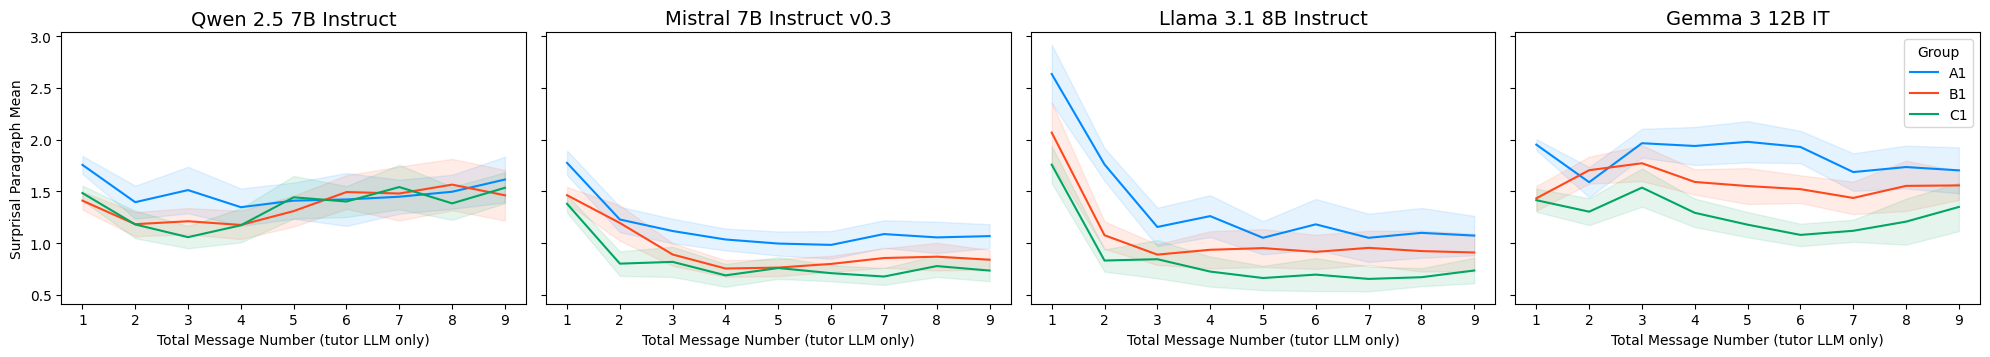

In [41]:
cols = ["surprisal_paragraph"]

# aggregate data
agg_df = aggregate_df(assistant_df, cols_to_aggregate=cols, ci_to_cols=True)

colors = ["#008aff", "#ff471a", "#00a661"]

vars = [f"{col}_mean" for col in cols]
ci_vars = [f"{col}_ci" for col in cols]

fig = line_plot_variables(df=agg_df, 
                    x_var="total_message_number", 
                    y_vars=vars, 
                    ci_vars=ci_vars,
                    group_var="group",
                    model_var="model", 
                    x_label_text="Total Message Number (tutor LLM only)", 
                    group_colors=colors)

fig.savefig(curves_dir / "surprisal.png", dpi=300)

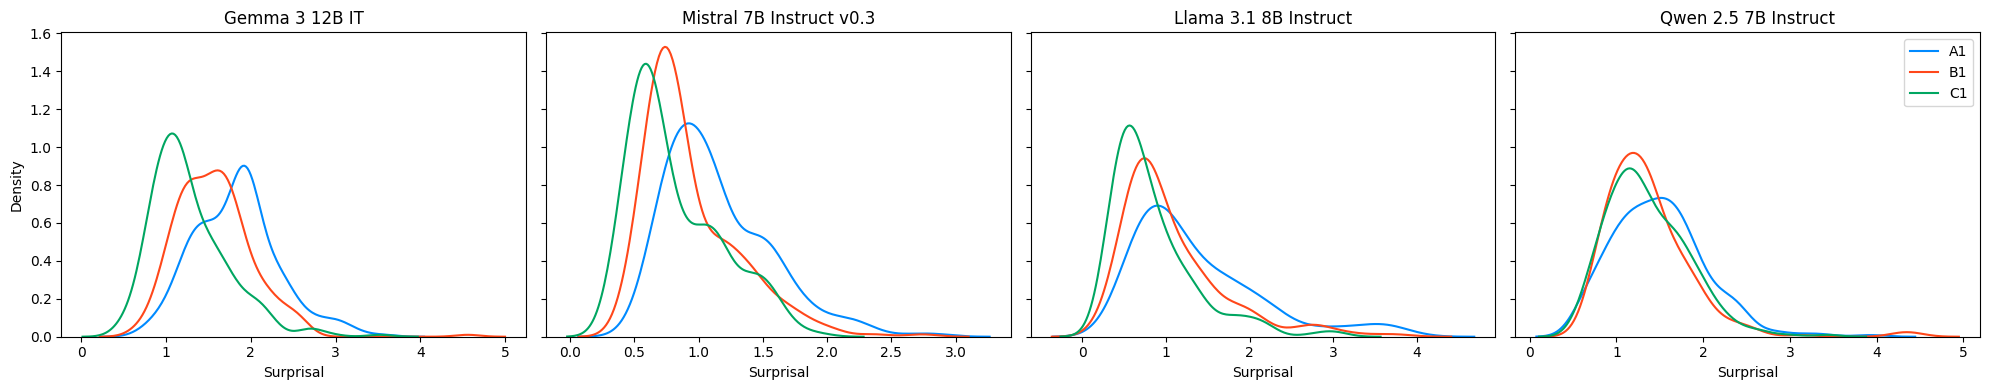

In [42]:
# distribution plot
fig = distribution_plot(assistant_df, 
                        x_vars=["surprisal_paragraph"], 
                        normalize=True,
                        alpha=0.5, 
                        x_label_texts=["Surprisal"], 
                        density_lines=True)

fig.savefig(dist_dir / "surprisal.png", dpi=300)